Suppose that I want to interpolate the following data

In [1]:
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
#Set the default figure size for the notebook, so they are not all tiny
matplotlib.rcParams['figure.figsize'] = (12,8)

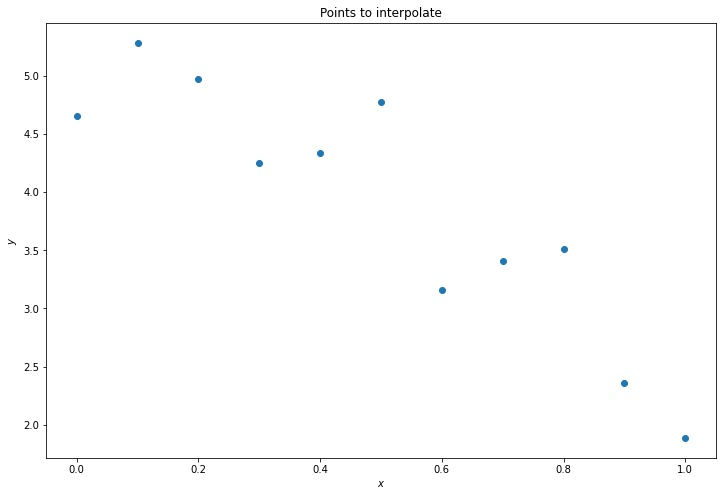

In [3]:
gaussian_1d = scipy.stats.multivariate_normal(mean = np.zeros(1),cov = 0.1)
scipy.random.seed(123)

n = 11
x = np.linspace(0,1,num = n)
x_grid = np.linspace(0,1,num=200)
y = 0.1*x**5 - 3*x**2 + 5 + gaussian_1d.rvs(size=n)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Points to interpolate");
plt.show()

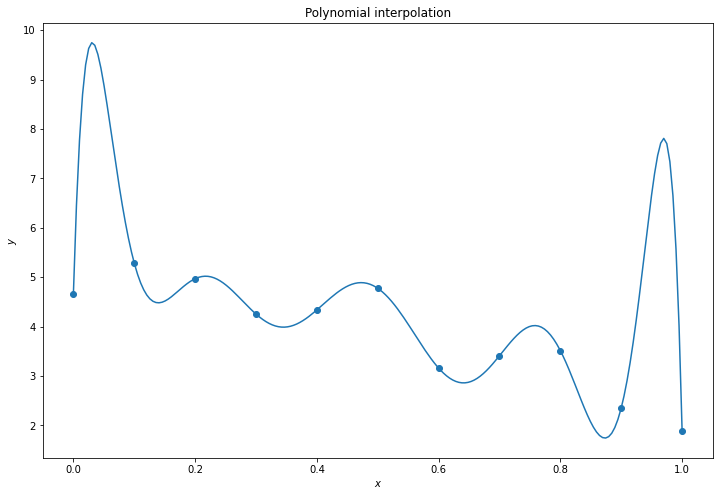

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_grid, np.polyval(np.polyfit(x,y,deg=n-1),x_grid))

ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Polynomial interpolation");
plt.show()

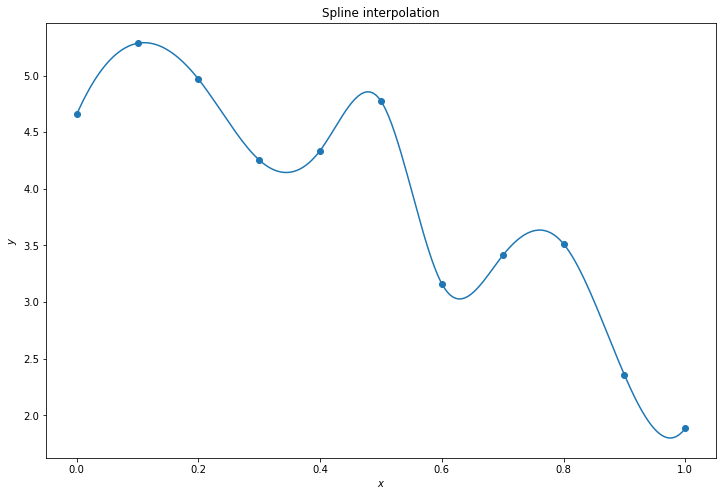

In [5]:
spl = InterpolatedUnivariateSpline(x,y)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_grid, spl(x_grid))

ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Spline interpolation");
plt.show()

Now let's try to approximate the mean, rather than the points.

Python does not seem to directly have a nice library for smoothing splines, but they are a piece of a larger method called Generalized Additive Models.  We'll abuse that library to get our fits for now.

We will learn more about GAMs very soon.

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from pygam import LinearGAM
#from pygam.utils import generate_X_grid

In [8]:
#Need x to be two-dimensional
x = x.reshape((len(x),1))

In [9]:
gam = LinearGAM()


In [10]:
lams = np.logspace(-10, 3, 30)
cvscores = gam.gridsearch(x,y,lam = lams, return_scores=True)

100% (30 of 30) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


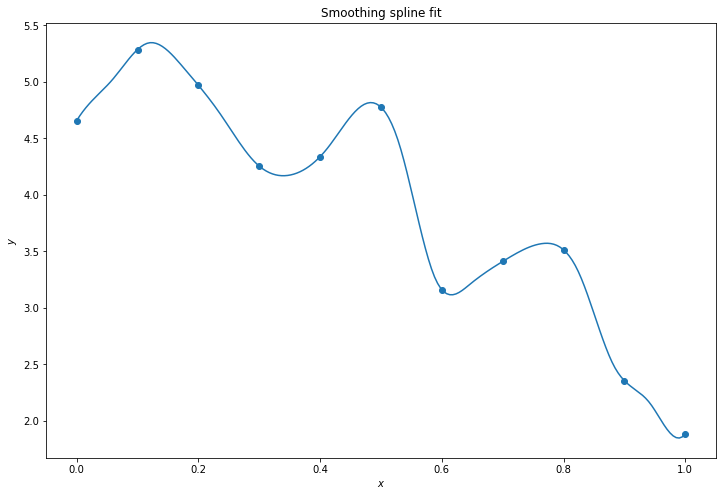

In [11]:
fig, ax = plt.subplots()
ax.plot(x_grid, gam.predict(x_grid))
ax.scatter(x, y)
ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Smoothing spline fit");
plt.show()

The previous fit cross-validated the lambda smoothing.  If we change the smoothing, we get different fits

In [12]:
#gam_smalllambda = LinearGAM(n_splines=n+1, lam=gam.lam*0.01).fit(x,y)
#gam_biglambda = LinearGAM(n_splines=n+1, lam=gam.lam*100).fit(x,y)
gam_smalllambda = LinearGAM(n_splines=n+1, lam=0.1).fit(x,y)
gam_biglambda = LinearGAM(n_splines=n+1, lam=100).fit(x,y)


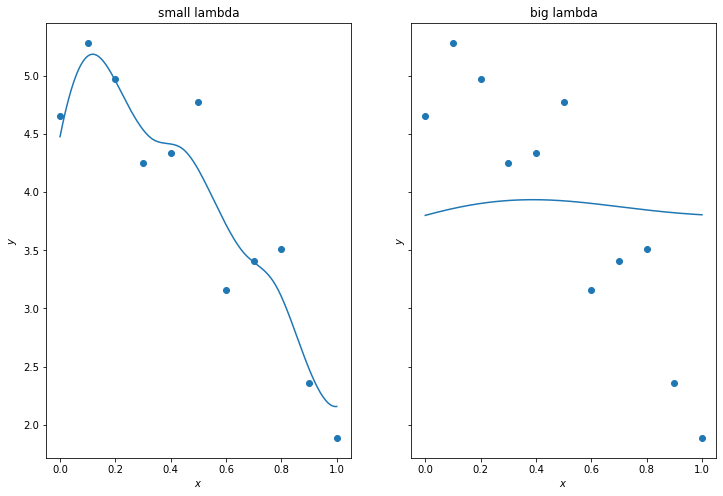

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(x_grid, gam_smalllambda.predict(x_grid))
ax1.scatter(x, y)
ax1.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"small lambda");
ax2.plot(x_grid, gam_biglambda.predict(x_grid))
ax2.scatter(x, y)
ax2.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"big lambda");

plt.show()

In practice, we can cross-validate lambda.  Let's look at a bigger data set.

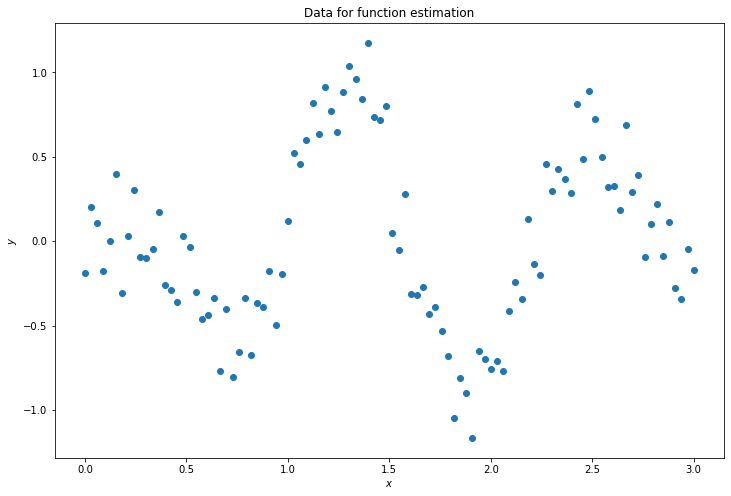

In [14]:
gaussian_1d = scipy.stats.multivariate_normal(mean = np.zeros(1),cov = 0.03)
scipy.random.seed(123)

n = 100
x = np.linspace(0,3,num = n)
x_grid = np.linspace(0,3,num=1000)
y = np.sin(x)*np.cos(5*x) +  gaussian_1d.rvs(size=n)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Data for function estimation");
plt.show()

x = x.reshape((n,1))

In [15]:
gam = LinearGAM().gridsearch(x,y,lam = np.logspace(-5, 3, 30), keep_best=True)
print(gam.lam)
np.logspace(-5, 3, 30)

100% (30 of 30) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[[0.2592943797404667]]


array([1.00000000e-05, 1.88739182e-05, 3.56224789e-05, 6.72335754e-05,
       1.26896100e-04, 2.39502662e-04, 4.52035366e-04, 8.53167852e-04,
       1.61026203e-03, 3.03919538e-03, 5.73615251e-03, 1.08263673e-02,
       2.04335972e-02, 3.85662042e-02, 7.27895384e-02, 1.37382380e-01,
       2.59294380e-01, 4.89390092e-01, 9.23670857e-01, 1.74332882e+00,
       3.29034456e+00, 6.21016942e+00, 1.17210230e+01, 2.21221629e+01,
       4.17531894e+01, 7.88046282e+01, 1.48735211e+02, 2.80721620e+02,
       5.29831691e+02, 1.00000000e+03])

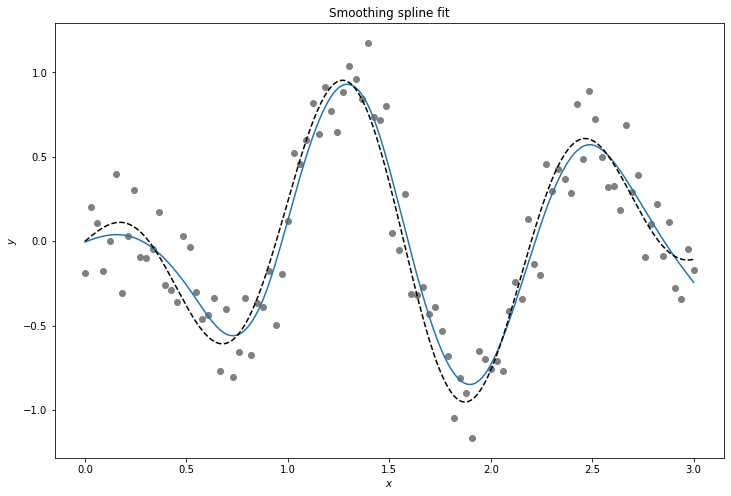

In [16]:
fig, ax = plt.subplots()
ax.plot(x_grid, gam.predict(x_grid))
ax.scatter(x, y, c='grey')
ax.plot(x_grid, np.sin(x_grid)*np.cos(5*x_grid), linestyle='--', c='k')
ax.set(xlabel = r"$x$",
       ylabel = r"$y$",
       title = r"Smoothing spline fit");
plt.show()

In [17]:
import rpy2
%load_ext rpy2.ipython

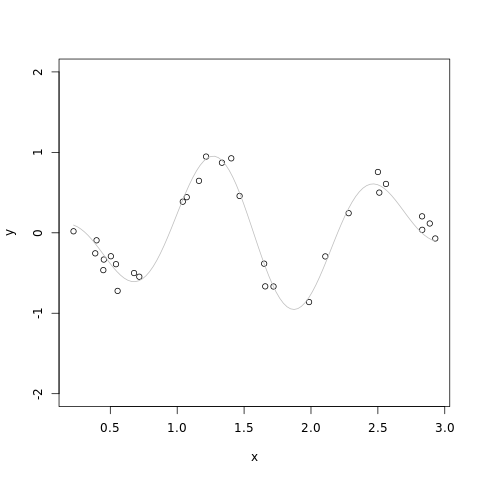

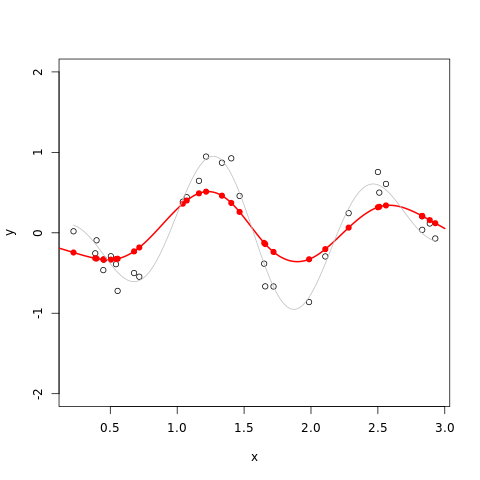

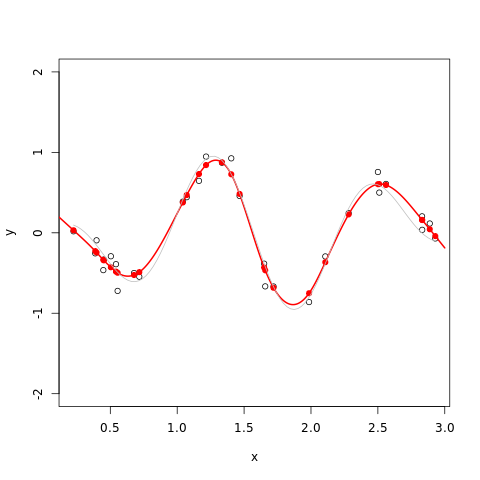

In [18]:
%%R
true.curve = function(x) {sin(x)*cos(5*x)}
ylim = c(-2,2)
#curve(true.curve(x),from=0,to=3,xlab="x",ylab=expression(f(x)),ylim=ylim)

set.seed(2)
n = 30
x = runif(n,0,3)
x.grid = seq(from=0, to=3, length.out=500)
y = true.curve(x)+rnorm(length(x),0,0.1)
plot(x,y,xlab="x",ylab="y",ylim=ylim)
curve(true.curve(x),col="grey",add=TRUE)

#oversmooth
spl = smooth.spline(x,y, lambda = 0.001)
plot(x,y,xlab="x",ylab="y",ylim=ylim)
lines(x.grid, predict(spl, x.grid)$y, col='red', lwd=2)
points(spl$x, spl$y, col='red', pch=19)
curve(true.curve(x),col="grey",add=TRUE)

spl = smooth.spline(x,y)
plot(x,y,xlab="x",ylab="y",ylim=ylim)
lines(x.grid, predict(spl, x.grid)$y, col='red', lwd=2)
points(spl$x, spl$y, col='red', pch=19)
curve(true.curve(x),col="grey",add=TRUE)
